Candidate: Ivomar Brito Soares

Email: ivomarbsoares@gmail.com

## Summary

<ul>
    <li>Importing libraries</li>
    <li>Utility methods</li>
    <li>Reading data set</li>
    <li>Initial Exploratory Data Analysis (EDA)</li>
    <li>Feature engineering for EDA</li>
    <li>Plotting histograms of both continous targets</li>
    <li>Plotting word cloud of features column</li>
    <li>Investigating outliers</li>
</ul>

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

from wordcloud import WordCloud, STOPWORDS

## Utility methods

In [2]:
def numeric_exploratory_data_analysis(dataset, generate_csv=False):
    """
    Outputs a pandas dataframe with the dtypes, nan and zero value counts of all features. 
    Also outputs a csv file.
    """
    assert isinstance(dataset, pd.core.frame.DataFrame)
    assert isinstance(generate_csv, bool)

     # Shape of the a_dataset.
    print('Shape: {} \n'.format(dataset.shape))

    # Summary and statistical description of the a_dataset.
    print('Statistical Summary: \n {} \n'.format(dataset.describe()))
    features = list(dataset)

    numeric_analysis = pd.DataFrame(index=features, columns=['Dtypes',
                                                             '# of non NaN values',
                                                             '# of NaN values',
                                                             '# of non zero values',
                                                             '# of zero values',
                                                             '# of unique values',
                                                             'Unique values'])

    numeric_analysis['Dtypes']               = dataset.dtypes
    numeric_analysis['# of non NaN values']  = dataset.count()
    numeric_analysis['# of NaN values']      = len(dataset) - dataset.count()
    numeric_analysis['# of non zero values'] = dataset.astype(bool).sum(axis=0)
    numeric_analysis['# of zero values']     = len(dataset) - dataset.astype(bool).sum(axis=0)
    numeric_analysis['# of unique values']   = dataset.apply(pd.Series.nunique)
    numeric_analysis['Unique values']        = ''
 
    index = 0
    for feature in features:
        numeric_analysis.iloc[index, 6] = np.array_str(dataset[feature].unique())
        index = index + 1

    if generate_csv:
        numeric_analysis.to_csv(path_or_buf='numeric_analysis.csv')

    return numeric_analysis

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 
    ).generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

## Reading data set

In [3]:
dataset = pd.read_csv('train_data.csv')

In [4]:
dataset.head()

Unnamed: 0                                           features  \
0      110018  “Today, as in the past,” reads the title of th...   
1       14618  Crisp, dry and searing in acidity, this 100% v...   
2      108512  Light and lovely, this has just under 2% resid...   
3      129544  Borra's blend of 80% Petite Sirah, 10% Syrah a...   
4       85383  The spirit of South Africa's Swartland region ...   

  categorical_target_1 categorical_target_2  continuous_target_1  \
0               France      Sauvignon Blanc                   92   
1                   US      Sauvignon Blanc                   91   
2                   US             Riesling                   90   
3                   US            Red Blend                   89   
4         South Africa               Shiraz                   87   

   continous_target_2  
0                28.0  
1                22.0  
2                10.0  
3                35.0  
4                19.0

## Initial Exploratory Data Analysis (EDA)

Let's have an initial overview of the numeric columns of the dataset, as well as the types, number of missing values and zero values of all columns of the dataset.

In [5]:
numeric_exploratory_data_analysis(dataset)

Shape: (103976, 6) 

Statistical Summary: 
           Unnamed: 0  continuous_target_1  continous_target_2
count  103976.000000        103976.000000        96729.000000
mean    64961.082702            88.452662           35.450062
std     37503.444832             3.038889           41.120601
min         0.000000            80.000000            4.000000
25%     32502.500000            86.000000           17.000000
50%     64939.500000            88.000000           25.000000
75%     97423.250000            91.000000           42.000000
max    129970.000000           100.000000         2500.000000 



Dtypes  # of non NaN values  # of NaN values  \
Unnamed: 0              int64               103976                0   
features               object               103976                0   
categorical_target_1   object               103927               49   
categorical_target_2   object               103975                1   
continuous_target_1     int64               103976                0   
continous_target_2    float64                96729             7247   

                      # of non zero values  # of zero values  \
Unnamed: 0                          103975                 1   
features                            103976                 0   
categorical_target_1                103976                 0   
categorical_target_2                103976                 0   
continuous_target_1                 103976                 0   
continous_target_2                  103976                 0   

                      # of unique values  \
Unnamed: 0                        103976   
features                           97529   
categorical_target_1                  43   
categorical_target_2                 672   
continuous_target_1                   21   
continous_target_2                   371   

                                                          Unique values  
Unnamed: 0              [110018  14618 108512 ...  90029 129624  25002]  
features              ['“Today, as in the past,” reads the title of ...  
categorical_target_1  ['France' 'US' 'South Africa' 'Chile' 'Austria...  
categorical_target_2  ['Sauvignon Blanc' 'Riesling' 'Red Blend' 'Shi...  
continuous_target_1   [ 92  91  90  89  87  88  80  86  81  84  82  ...  
continous_target_2    [  28.   22.   10.   35.   19.   nan   18.   9...

<ul>
<li>continuous_target_1 has a mean of 88.45, min value of 80 and max value of 100.0, continues_target_2 has  a mean of 35.45, a min value of 4 and a max value of 2500, this max high max value may be an indication of outliers in the data.</li>
<li>categorical_target_1, which is possibly the country where the wine was produced, has 43 unique values. categorical_target_2, which is possibly the type of wine, has 672 unique values.</li>
<li>categorical_target_1 has 49 values missing, categorical_target_2 has one value missing and continuous_target_2 has 7247 values missing.</li>
<li>Unnamed: 0	might represent some id of some sort, does not add value to our learning model and can be ignored.</li>
</ul>

## Feature engineering for EDA

Let's create two new features for the length and word count of features column, this will help us understand the nature of the input features better.

In [6]:
dataset['features_len'] = dataset['features'].astype(str).apply(len)
dataset['features_word_count'] = dataset['features'].apply(lambda x: len(str(x).split()))

In [7]:
dataset['features_len'].iplot(
    kind='hist',
    bins=100,
    xTitle='features length',
    linecolor='black',
    yTitle='count',
    title='Features Text Length Distribution')

In [8]:
dataset['features_word_count'].iplot(
    kind='hist',
    bins=100,
    xTitle='features word count',
    linecolor='black',
    yTitle='count',
    title='Features word count Distribution')

<ul>
    <li>Both features length and word count follow a normal distribution.</li>
    <li>These features could be interesting two features to be added to our learning model.</li>
    <li>Another interesting new features that could be added is average word length, we can also calculate the number of numerics etc.</li>
    
</ul>

## Plotting histograms of both continous targets

In [9]:
dataset['continuous_target_1'].iplot(
    kind='hist',
    bins=100,
    xTitle='continuous_target_1',
    linecolor='black',
    yTitle='count',
    title='continuous_target_1 Distribution')

In [10]:
dataset['continous_target_2'].iplot(
    kind='hist',
    bins=300,
    xTitle='continous_target_2',
    linecolor='black',
    yTitle='count',
    title='continous_target_2 Distribution')

<ul>
<li>continuous_target_1 follows a normal distribution while continous_target_2 follows a distribution skewed to the left.</li>
<li>continous_target_2 could possibly be the price of the wine.</li>
    
</ul>

## Plotting word cloud of features column

This will help us have an overview of the most frequent words present at the features column and better understand the dataset.

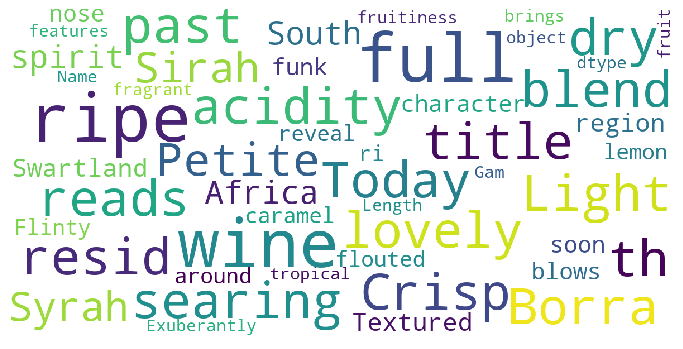

In [11]:
stopwords = set(STOPWORDS)  
show_wordcloud(dataset['features'])

As expected there are present several words that are related to wines and alcoholic drinks.

## Investigating outliers

Let's plot box-and-whisker, and using the Interquantile Range (IQR) method to investigate the presence of outliers at columns continuous_target_1 and continous_target_2.

A box-and-whisker plot uses quartiles (points that divide the data into four groups of equal size) to plot the shape of the data. The box represents the 1st and 3rd quartiles, which are equal to the 25th and 75th percentiles. The line inside the box represents the 2nd quartile, which is the median.

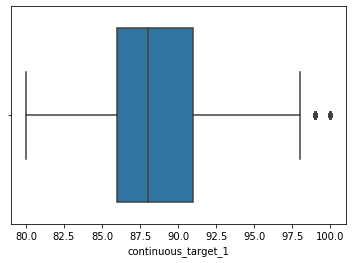

In [12]:
sns.boxplot(x=dataset['continuous_target_1'])

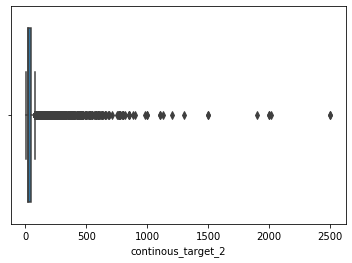

In [13]:
sns.boxplot(x=dataset['continous_target_2'])

By analysing the box-and-whisker plots above, it confirms our hypothesis that continous_target_2 is present with outliers, it might be interesting to further investigate the cause of such values. The presence of outliers in continuous_target_1 is much reduced.